In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
nash_data = pd.read_csv(
    Path("nash_laborforce2.csv"), index_col="Month", infer_datetime_format=True, parse_dates=True
)
nash_data.head()

Series ID  Year Period     Label   Value  Unnamed: 6  \
Month                                                                         
2010-01-01  LAUMT473498000000006  2010    M01  2010 Jan  855369         NaN   
2010-02-01  LAUMT473498000000006  2010    M02  2010 Feb  857834         NaN   
2010-03-01  LAUMT473498000000006  2010    M03  2010 Mar  863974         NaN   
2010-04-01  LAUMT473498000000006  2010    M04  2010 Apr  876458         NaN   
2010-05-01  LAUMT473498000000006  2010    M05  2010 May  880555         NaN   

            Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
Month                                                                      
2010-01-01         NaN         NaN         NaN          NaN          NaN   
2010-02-01         NaN         NaN         NaN          NaN          NaN   
2010-03-01         NaN         NaN         NaN          NaN          NaN   
2010-04-01         NaN         NaN         NaN          NaN          NaN   
2010-05-01         NaN         NaN         NaN          NaN          NaN   

            Unnamed: 12  Unnamed: 13  
Month                                 
2010-01-01          NaN          NaN  
2010-02-01          NaN          NaN  
2010-03-01          NaN          NaN  
2010-04-01          NaN          NaN  
2010-05-01          NaN          NaN

In [3]:
nash_labor = nash_data[['Value']]

nash_labor.head()

Value
Month             
2010-01-01  855369
2010-02-01  857834
2010-03-01  863974
2010-04-01  876458
2010-05-01  880555

In [4]:
nash_case_shiller = pd.read_csv(
    Path("nash_case_shiller.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)
nash_case_shiller.head()

CSUSHPISA
DATE                 
2010-01-01    147.394
2010-02-01    145.631
2010-03-01    145.859
2010-04-01    146.399
2010-05-01    146.389

In [5]:
nash_df = pd.merge(nash_labor,nash_case_shiller, left_index = True, right_index = True)

nash_df.columns = ['nash_labor_force','nash_case_shiller']

In [6]:
nash_df.head()

nash_labor_force  nash_case_shiller
2010-01-01            855369            147.394
2010-02-01            857834            145.631
2010-03-01            863974            145.859
2010-04-01            876458            146.399
2010-05-01            880555            146.389

In [7]:
nash_unemployment = pd.read_csv(
    Path("nash_unemployment.csv"), index_col="Month", infer_datetime_format=True, parse_dates=True
)
nash_unemployment.head()

Series ID  Year Period     Label  Value
Month                                                         
2010-01-01  LAUCA474000000000004  2010    M01  2010 Jan  91689
2010-02-01  LAUCA474000000000004  2010    M02  2010 Feb  89214
2010-03-01  LAUCA474000000000004  2010    M03  2010 Mar  88440
2010-04-01  LAUCA474000000000004  2010    M04  2010 Apr  82979
2010-05-01  LAUCA474000000000004  2010    M05  2010 May  81833

In [8]:
nash_unemployment = nash_unemployment[["Value"]] 

In [9]:
nash_unemployment.columns = ["nash_unemployment"]

In [10]:
nash_df = pd.merge(nash_df, nash_unemployment, left_index = True, right_index = True)

In [11]:
nash_df.head()

nash_labor_force  nash_case_shiller  nash_unemployment
2010-01-01            855369            147.394              91689
2010-02-01            857834            145.631              89214
2010-03-01            863974            145.859              88440
2010-04-01            876458            146.399              82979
2010-05-01            880555            146.389              81833

In [12]:
nash_df['nash_labor_force_pct'] = nash_df['nash_labor_force'].pct_change()

In [13]:
nash_df['nash_case_shiller_pct'] = nash_df['nash_case_shiller'].pct_change()

In [14]:
#bring in data sets from team

In [15]:
hr_wage_nash = pd.read_csv(
    Path("hr_wage_nash.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)
hr_wage_nash.head()

SMU47349800500000003SA
DATE                              
2007-01-01               19.496529
2007-02-01               19.750042
2007-03-01               19.372021
2007-04-01               19.754380
2007-05-01               19.439147

In [16]:
hr_wage_nash.columns = ['hr_wage_nash']

In [17]:
nash_df = pd.merge(nash_df, hr_wage_nash, left_index = True, right_index = True)

In [18]:
sfr_perm_nash = pd.read_csv(
    Path("sfr_perm_nash.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)


In [19]:
sfr_perm_nash.columns = ['sfr_perm_nash.csv']

In [20]:
nash_df = pd.merge(nash_df, sfr_perm_nash, left_index = True, right_index = True)

In [21]:
nash_df

nash_labor_force  nash_case_shiller  nash_unemployment  \
2010-01-01            855369            147.394              91689   
2010-02-01            857834            145.631              89214   
2010-03-01            863974            145.859              88440   
2010-04-01            876458            146.399              82979   
2010-05-01            880555            146.389              81833   
...                      ...                ...                ...   
2020-10-01           1099505            229.309              73560   
2020-11-01           1079907            232.560              49355   
2020-12-01           1080130            235.442              53702   
2021-01-01           1077029            238.421              49808   
2021-02-01           1076114            241.130              45488   

            nash_labor_force_pct  nash_case_shiller_pct  hr_wage_nash  \
2010-01-01                   NaN                    NaN     21.758227   
2010-02-01              0.002882              -0.011961     21.623596   
2010-03-01              0.007158               0.001566     21.569269   
2010-04-01              0.014450               0.003702     21.822696   
2010-05-01              0.004674              -0.000068     21.770178   
...                          ...                    ...           ...   
2020-10-01             -0.000218               0.015450     27.940167   
2020-11-01             -0.017824               0.014177     28.355822   
2020-12-01              0.000206               0.012393     28.354970   
2021-01-01             -0.002871               0.012653     28.451445   
2021-02-01             -0.000850               0.011362     28.888412   

            sfr_perm_nash.csv  
2010-01-01         418.150032  
2010-02-01         346.843524  
2010-03-01         443.097642  
2010-04-01         323.745110  
2010-05-01         247.756904  
...                       ...  
2020-10-01        1281.074976  
2020-11-01        1281.966152  
2020-12-01        1589.956013  
2021-01-01        1349.114467  
2021-02-01        1284.547689  

[134 rows x 7 columns]

In [22]:
monthly_econindex_nash = pd.read_csv(
    Path("Monthly_Nash_Econ_Index.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [23]:
monthly_econindex_nash.columns = ["monthly_econindex_nash"]

In [24]:
nash_df = pd.merge(nash_df, monthly_econindex_nash, left_index = True, right_index = True)

In [25]:
weekly_nash_earnings = pd.read_csv(
    Path("Monthly_Nash_Weekly_Earnings.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [26]:
weekly_nash_earnings.columns = ["weekly_nash_earnings"]

In [27]:
nash_df = pd.merge(nash_df, weekly_nash_earnings, left_index = True, right_index = True)

In [28]:
monthly_nash_weekly_hours = pd.read_csv(
    Path('Monthly_Nash_Weekly_Hours.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [29]:
nash_df = pd.merge(nash_df, monthly_nash_weekly_hours, left_index = True, right_index = True)

In [30]:
nash_df

nash_labor_force  nash_case_shiller  nash_unemployment  \
2010-01-01            855369            147.394              91689   
2010-02-01            857834            145.631              89214   
2010-03-01            863974            145.859              88440   
2010-04-01            876458            146.399              82979   
2010-05-01            880555            146.389              81833   
...                      ...                ...                ...   
2019-08-01           1086380            210.374              30712   
2019-09-01           1088108            210.959              28341   
2019-10-01           1089760            211.552              31373   
2019-11-01           1094358            212.395              29320   
2019-12-01           1095556            213.391              29123   

            nash_labor_force_pct  nash_case_shiller_pct  hr_wage_nash  \
2010-01-01                   NaN                    NaN     21.758227   
2010-02-01              0.002882              -0.011961     21.623596   
2010-03-01              0.007158               0.001566     21.569269   
2010-04-01              0.014450               0.003702     21.822696   
2010-05-01              0.004674              -0.000068     21.770178   
...                          ...                    ...           ...   
2019-08-01             -0.011618               0.003386     27.670806   
2019-09-01              0.001591               0.002781     27.674895   
2019-10-01              0.001518               0.002811     27.670939   
2019-11-01              0.004219               0.003985     27.620988   
2019-12-01              0.001095               0.004689     27.680729   

            sfr_perm_nash.csv  monthly_econindex_nash  weekly_nash_earnings  \
2010-01-01         418.150032                    2.17                772.29   
2010-02-01         346.843524                    2.76                764.90   
2010-03-01         443.097642                    3.66                764.25   
2010-04-01         323.745110                    4.41                780.76   
2010-05-01         247.756904                    4.36                785.16   
...                       ...                     ...                   ...   
2019-08-01        1264.322491                    3.61                979.09   
2019-09-01        1208.818436                    3.34                999.72   
2019-10-01        1360.909353                    3.17                971.17   
2019-11-01        1261.505204                    3.53                983.35   
2019-12-01        1175.089693                    3.55               1005.39   

            Weekly_Hours  
2010-01-01          35.2  
2010-02-01          35.2  
2010-03-01          35.3  
2010-04-01          35.7  
2010-05-01          36.0  
...                  ...  
2019-08-01          35.5  
2019-09-01          36.0  
2019-10-01          35.2  
2019-11-01          35.5  
2019-12-01          36.1  

[120 rows x 10 columns]

In [31]:
# end of bringing in other data sets from the team

In [32]:
nash_df.head(20)

nash_labor_force  nash_case_shiller  nash_unemployment  \
2010-01-01            855369            147.394              91689   
2010-02-01            857834            145.631              89214   
2010-03-01            863974            145.859              88440   
2010-04-01            876458            146.399              82979   
2010-05-01            880555            146.389              81833   
2010-06-01            887901            145.716              85996   
2010-07-01            888009            144.985              85105   
2010-08-01            884095            143.908              84396   
2010-09-01            885992            143.011              81555   
2010-10-01            888929            142.522              80206   
2010-11-01            888624            142.167              81421   
2010-12-01            887293            142.057              79874   
2011-01-01            880593            141.522              85035   
2011-02-01            885430            140.351              82697   
2011-03-01            890548            139.983              81002   
2011-04-01            893918            140.007              76898   
2011-05-01            895200            139.901              76412   
2011-06-01            901298            139.857              83623   
2011-07-01            902803            139.727              79886   
2011-08-01            896459            139.305              77851   

            nash_labor_force_pct  nash_case_shiller_pct  hr_wage_nash  \
2010-01-01                   NaN                    NaN     21.758227   
2010-02-01              0.002882              -0.011961     21.623596   
2010-03-01              0.007158               0.001566     21.569269   
2010-04-01              0.014450               0.003702     21.822696   
2010-05-01              0.004674              -0.000068     21.770178   
2010-06-01              0.008342              -0.004597     22.034571   
2010-07-01              0.000122              -0.005017     21.820211   
2010-08-01             -0.004408              -0.007428     21.970781   
2010-09-01              0.002146              -0.006233     21.970427   
2010-10-01              0.003315              -0.003419     22.199269   
2010-11-01             -0.000343              -0.002491     22.145508   
2010-12-01             -0.001498              -0.000774     22.097074   
2011-01-01             -0.007551              -0.003766     22.194856   
2011-02-01              0.005493              -0.008274     22.138202   
2011-03-01              0.005780              -0.002622     22.107906   
2011-04-01              0.003784               0.000171     21.989722   
2011-05-01              0.001434              -0.000757     22.115479   
2011-06-01              0.006812              -0.000315     21.932891   
2011-07-01              0.001670              -0.000930     22.177633   
2011-08-01             -0.007027              -0.003020     22.185396   

            sfr_perm_nash.csv  monthly_econindex_nash  weekly_nash_earnings  \
2010-01-01         418.150032                    2.17                772.29   
2010-02-01         346.843524                    2.76                764.90   
2010-03-01         443.097642                    3.66                764.25   
2010-04-01         323.745110                    4.41                780.76   
2010-05-01         247.756904                    4.36                785.16   
2010-06-01         346.503617                    4.15                782.84   
2010-07-01         276.908457                    3.84                771.94   
2010-08-01         288.395233                    3.71                773.14   
2010-09-01         328.395110                    3.83                770.70   
2010-10-01         288.808202                    3.84                771.40   
2010-11-01         283.715199                    3.62                768.60   
2010-12-01         318.903134                    3.78      

In [33]:
nash_df.head()
#df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

nash_labor_force  nash_case_shiller  nash_unemployment  \
2010-01-01            855369            147.394              91689   
2010-02-01            857834            145.631              89214   
2010-03-01            863974            145.859              88440   
2010-04-01            876458            146.399              82979   
2010-05-01            880555            146.389              81833   

            nash_labor_force_pct  nash_case_shiller_pct  hr_wage_nash  \
2010-01-01                   NaN                    NaN     21.758227   
2010-02-01              0.002882              -0.011961     21.623596   
2010-03-01              0.007158               0.001566     21.569269   
2010-04-01              0.014450               0.003702     21.822696   
2010-05-01              0.004674              -0.000068     21.770178   

            sfr_perm_nash.csv  monthly_econindex_nash  weekly_nash_earnings  \
2010-01-01         418.150032                    2.17                772.29   
2010-02-01         346.843524                    2.76                764.90   
2010-03-01         443.097642                    3.66                764.25   
2010-04-01         323.745110                    4.41                780.76   
2010-05-01         247.756904                    4.36                785.16   

            Weekly_Hours  
2010-01-01          35.2  
2010-02-01          35.2  
2010-03-01          35.3  
2010-04-01          35.7  
2010-05-01          36.0

In [34]:
nash_df_3M = nash_df.copy()

nash_df_6M = nash_df.copy()

nash_df_24M = nash_df.copy()


In [35]:
nash_df["case_shifted"] = nash_df["nash_case_shiller_pct"].shift(-12)

In [36]:
# another idea is to predict the price level in a year based on the features in a given month, 
# could make this rolling features if we want
# experiment with different lags

nash_df["case_shifted_actual"] = nash_df["nash_case_shiller"].shift(-12)

In [37]:
nash_df.head(10)

nash_labor_force  nash_case_shiller  nash_unemployment  \
2010-01-01            855369            147.394              91689   
2010-02-01            857834            145.631              89214   
2010-03-01            863974            145.859              88440   
2010-04-01            876458            146.399              82979   
2010-05-01            880555            146.389              81833   
2010-06-01            887901            145.716              85996   
2010-07-01            888009            144.985              85105   
2010-08-01            884095            143.908              84396   
2010-09-01            885992            143.011              81555   
2010-10-01            888929            142.522              80206   

            nash_labor_force_pct  nash_case_shiller_pct  hr_wage_nash  \
2010-01-01                   NaN                    NaN     21.758227   
2010-02-01              0.002882              -0.011961     21.623596   
2010-03-01              0.007158               0.001566     21.569269   
2010-04-01              0.014450               0.003702     21.822696   
2010-05-01              0.004674              -0.000068     21.770178   
2010-06-01              0.008342              -0.004597     22.034571   
2010-07-01              0.000122              -0.005017     21.820211   
2010-08-01             -0.004408              -0.007428     21.970781   
2010-09-01              0.002146              -0.006233     21.970427   
2010-10-01              0.003315              -0.003419     22.199269   

            sfr_perm_nash.csv  monthly_econindex_nash  weekly_nash_earnings  \
2010-01-01         418.150032                    2.17                772.29   
2010-02-01         346.843524                    2.76                764.90   
2010-03-01         443.097642                    3.66                764.25   
2010-04-01         323.745110                    4.41                780.76   
2010-05-01         247.756904                    4.36                785.16   
2010-06-01         346.503617                    4.15                782.84   
2010-07-01         276.908457                    3.84                771.94   
2010-08-01         288.395233                    3.71                773.14   
2010-09-01         328.395110                    3.83                770.70   
2010-10-01         288.808202                    3.84                771.40   

            Weekly_Hours  case_shifted  case_shifted_actual  
2010-01-01          35.2     -0.003766              141.522  
2010-02-01          35.2     -0.008274              140.351  
2010-03-01          35.3     -0.002622              139.983  
2010-04-01          35.7      0.000171              140.007  
2010-05-01          36.0     -0.000757              139.901  
2010-06-01          35.6     -0.000315              139.857  
2010-07-01          35.2     -0.000930              139.727  
2010-08-01          35.4     -0.003020              139.305  
2010-09-01          35.0     -0.004601              138.664  
2010-10-01          35.0     -0.005149              137.950

In [38]:
nash_df['nash_unemployment_pct'] = nash_df['nash_unemployment'].pct_change()

In [39]:
nash_df.dropna(inplace = True)

In [40]:
nash_df.head(15)

nash_labor_force  nash_case_shiller  nash_unemployment  \
2010-02-01            857834            145.631              89214   
2010-03-01            863974            145.859              88440   
2010-04-01            876458            146.399              82979   
2010-05-01            880555            146.389              81833   
2010-06-01            887901            145.716              85996   
2010-07-01            888009            144.985              85105   
2010-08-01            884095            143.908              84396   
2010-09-01            885992            143.011              81555   
2010-10-01            888929            142.522              80206   
2010-11-01            888624            142.167              81421   
2010-12-01            887293            142.057              79874   
2011-01-01            880593            141.522              85035   
2011-02-01            885430            140.351              82697   
2011-03-01            890548            139.983              81002   
2011-04-01            893918            140.007              76898   

            nash_labor_force_pct  nash_case_shiller_pct  hr_wage_nash  \
2010-02-01              0.002882              -0.011961     21.623596   
2010-03-01              0.007158               0.001566     21.569269   
2010-04-01              0.014450               0.003702     21.822696   
2010-05-01              0.004674              -0.000068     21.770178   
2010-06-01              0.008342              -0.004597     22.034571   
2010-07-01              0.000122              -0.005017     21.820211   
2010-08-01             -0.004408              -0.007428     21.970781   
2010-09-01              0.002146              -0.006233     21.970427   
2010-10-01              0.003315              -0.003419     22.199269   
2010-11-01             -0.000343              -0.002491     22.145508   
2010-12-01             -0.001498              -0.000774     22.097074   
2011-01-01             -0.007551              -0.003766     22.194856   
2011-02-01              0.005493              -0.008274     22.138202   
2011-03-01              0.005780              -0.002622     22.107906   
2011-04-01              0.003784               0.000171     21.989722   

            sfr_perm_nash.csv  monthly_econindex_nash  weekly_nash_earnings  \
2010-02-01         346.843524                    2.76                764.90   
2010-03-01         443.097642                    3.66                764.25   
2010-04-01         323.745110                    4.41                780.76   
2010-05-01         247.756904                    4.36                785.16   
2010-06-01         346.503617                    4.15                782.84   
2010-07-01         276.908457                    3.84                771.94   
2010-08-01         288.395233                    3.71                773.14   
2010-09-01         328.395110                    3.83                770.70   
2010-10-01         288.808202                    3.84                771.40   
2010-11-01         283.715199                    3.62                768.60   
2010-12-01         318.903134                    3.78                774.31   
2011-01-01         269.159883                    4.07                782.25   
2011-02-01         277.609562                    4.63                779.92   
2011-03-01         336.139160                    5.08                785.88   
2011-04-01         340.005104                    5.32                783.91   

            Weekly_Hours  case_shifted  case_shifted_actual  \
2010-02-01          35.2     -0.008274              140.351   
2010-03-01          35.3     -0.002622              139.983   
2010-04-01          35.7      0.000171              140.007   
2010-05-01          36.0     -0.000757              139.901   
2010-06-01          35.6     -0.000315              139.857   
2010-07-01          35.2     -0.000930              139.727   
2010-08-01      

In [41]:
nash_df.to_csv(Path("nash_laborforce.csv"))

In [42]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# XGBoost

In [43]:
nash_df.columns

Index(['nash_labor_force', 'nash_case_shiller', 'nash_unemployment',
       'nash_labor_force_pct', 'nash_case_shiller_pct', 'hr_wage_nash',
       'sfr_perm_nash.csv', 'monthly_econindex_nash', 'weekly_nash_earnings',
       'Weekly_Hours', 'case_shifted', 'case_shifted_actual',
       'nash_unemployment_pct'],
      dtype='object')

In [44]:
X = nash_df[["nash_unemployment","nash_labor_force","hr_wage_nash","sfr_perm_nash.csv","monthly_econindex_nash","weekly_nash_earnings","Weekly_Hours"]]

y = nash_df[['case_shifted_actual']]

In [45]:
# # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [46]:
# # Use the MinMaxScaler to scale data between 0 and 1.
# # percentage do not use min max, can scale the nominal number
# # percentages then use standard scaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# scaler.fit(y)
# y_train = scaler.transform(y_train)
# y_test = scaler.transform(y_test)

In [47]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# print (f"X_train sample values:\n{X_train[:5]} \n")
# print (f"X_test sample values:\n{X_test[:5]}")

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# # Define the LSTM RNN model.
# # comment out drop out layers, when ready uncomment and run
# # square the number of rows for initial numnber of units, 1000x, 2 to the power of x = 1,000,0000
# # maybe add more layers
# model = Sequential()

# number_units = 10
# dropout_fraction = 0.2

# # Layer 1
# model.add(LSTM(
#     units=number_units,
#     return_sequences=True,
#     input_shape=(X_train.shape[1], 1))
#     )
# model.add(Dropout(dropout_fraction))
# # Layer 2
# model.add(LSTM(units=number_units, return_sequences=True))
# model.add(Dropout(dropout_fraction))
# # Layer 3
# model.add(LSTM(units=number_units))
# model.add(Dropout(dropout_fraction))

# # Output layer
# model.add(Dense(1))

In [ ]:
# # Compile the model
# model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# model.summary()

In [ ]:
# # general rule, # of columns, like 5
# model.fit(X_train, y_train, epochs=5, shuffle=False, batch_size=1, verbose=1)

In [ ]:
# use sklearn, pass result from prediction into the rquared
#sklearn.metrics, r squared -> add in the two parameters, 

# model.evaluate(X_test, y_test)

In [ ]:
# Make some predictions
# predicted = model.predict(X_test)

In [ ]:
# Recover the original prices instead of the scaled version
# predicted_prices = scaler.inverse_transform(predicted)
# real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
# compare = pd.DataFrame({
#     "Real": real_prices.ravel(),
#     "Predicted": predicted_prices.ravel()
#     }, index = nash_df.index[-len(real_prices): ])
# compare.head(10)

In [ ]:
# Plot the real vs predicted prices as a line chart
# compare.plot()

In [48]:
X = nash_df[["nash_unemployment","nash_labor_force","hr_wage_nash","sfr_perm_nash.csv","monthly_econindex_nash","weekly_nash_earnings","Weekly_Hours"]]

y = nash_df[['case_shifted_actual']]

In [49]:
# # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [51]:
X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoLarsCV
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor

In [60]:
# Create and fit model to the data, make predictions
model = linear_model.TweedieRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



C:\Users\eprie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [61]:
y_test.head()

case_shifted_actual  Out-of-Sample Predictions
2016-04-01              188.848                 185.944724
2016-05-01              189.767                 188.919022
2016-06-01              190.674                 188.115669
2016-07-01              191.581                 190.316259
2016-08-01              192.780                 188.889484

In [62]:
out_of_sample_results = y_test

In [63]:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

<ipython-input-63-58808357c719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


In [64]:
out_of_sample_results.head(25)

case_shifted_actual  Out-of-Sample Predictions
2016-04-01              188.848                 185.944724
2016-05-01              189.767                 188.919022
2016-06-01              190.674                 188.115669
2016-07-01              191.581                 190.316259
2016-08-01              192.780                 188.889484
2016-09-01              193.806                 191.751955
2016-10-01              194.772                 193.456815
2016-11-01              195.856                 195.889291
2016-12-01              197.035                 195.640691
2017-01-01              198.173                 197.152174
2017-02-01              199.125                 198.201154
2017-03-01              200.087                 199.436302
2017-04-01              200.925                 197.651755
2017-05-01              201.750                 202.185246
2017-06-01              202.559                 204.641116
2017-07-01              203.135                 202.301235
2017-08-01              203.875                 201.297056
2017-09-01              204.396                 202.465348
2017-10-01              204.995                 201.349112
2017-11-01              205.441                 203.424533
2017-12-01              205.853                 203.490379
2018-01-01              206.222                 204.121982
2018-02-01              206.616                 205.996683
2018-03-01              207.305                 206.268035
2018-04-01              208.019                 209.508638

In [65]:
#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted_actual"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted_actual"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

Out-of-sample Root Mean Squared Error (RMSE): 2.0032759736069075
Out-of-Sample r2: 0.9189394397867261


In [66]:
#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted_actual"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted_actual"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")

In Sample Root Mean Squared Error (RMSE): 5.460340071386014
In sample r2: 0.8878042774048271


<ipython-input-66-0eed2533241e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_sample_results["in-sample predictions"] = model.predict(X_train)


In [67]:
out_of_sample_results = nash_df = pd.merge(out_of_sample_results, nash_df["nash_case_shiller"], left_index = True, right_index = True) 

out_of_sample_results.head(14)

case_shifted_actual  Out-of-Sample Predictions  nash_case_shiller
2016-04-01              188.848                 185.944724            178.812
2016-05-01              189.767                 188.919022            179.488
2016-06-01              190.674                 188.115669            180.159
2016-07-01              191.581                 190.316259            180.899
2016-08-01              192.780                 188.889484            181.897
2016-09-01              193.806                 191.751955            182.851
2016-10-01              194.772                 193.456815            183.758
2016-11-01              195.856                 195.889291            184.742
2016-12-01              197.035                 195.640691            185.687
2017-01-01              198.173                 197.152174            186.791
2017-02-01              199.125                 198.201154            187.314
2017-03-01              200.087                 199.436302            188.065
2017-04-01              200.925                 197.651755            188.848
2017-05-01              201.750                 202.185246            189.767

In [ ]:
# pca analysis
# consider windows, trailing 3 months
# windows possibly with lstm
# random forest, feature importance


# also look at 6 months and 3 months, which out of sample more accurate
# mape, other metric for forecasting (at different offsets), 
# compare out of sample accuracies across MSAs
# XG boost linear regressor, can take a while to train


# insights on the nature of case shiller
# cross msa comparisons

In [68]:
# nash_df_3M = nash_df

nash_df_3M["case_shifted"] = nash_df_3M["nash_case_shiller"].shift(-3)

nash_df_3M.dropna(inplace = True)

# nash_df_6M = nash_df

nash_df_6M["case_shifted"] = nash_df_6M["nash_case_shiller"].shift(-6)

nash_df_6M.dropna(inplace = True)


# nash_df_24M = nash_df

nash_df_24M["case_shifted"] = nash_df_24M["nash_case_shiller"].shift(-24)

nash_df_24M.dropna(inplace = True)




In [70]:
#3M Model

X = nash_df_3M[["nash_unemployment","nash_labor_force","hr_wage_nash","sfr_perm_nash.csv","monthly_econindex_nash","weekly_nash_earnings","Weekly_Hours"]]

y = nash_df_3M[["case_shifted"]]

split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]


X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

model = linear_model.TweedieRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

out_of_sample_results = y_test

out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")

Out-of-sample Root Mean Squared Error (RMSE): 3.4338892656202917
Out-of-Sample r2: 0.798013528323352
In Sample Root Mean Squared Error (RMSE): 5.322178653503073
In sample r2: 0.8860396370110362


C:\Users\eprie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-70-caeffccab39f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
<ipython-input-70-caeffccab39f>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_sample_resu

In [72]:
out_of_sample_results = pd.merge(out_of_sample_results, nash_df_3M["nash_case_shiller"], left_index = True, right_index = True) 

out_of_sample_results.head(14)

case_shifted  Out-of-Sample Predictions  nash_case_shiller_x  \
2016-11-01       187.314                 186.824272              184.742   
2016-12-01       188.065                 186.646257              185.687   
2017-01-01       188.848                 188.467177              186.791   
2017-02-01       189.767                 189.162546              187.314   
2017-03-01       190.674                 189.903899              188.065   
2017-04-01       191.581                 188.999979              188.848   
2017-05-01       192.780                 192.186152              189.767   
2017-06-01       193.806                 193.809202              190.674   
2017-07-01       194.772                 192.376592              191.581   
2017-08-01       195.856                 192.251450              192.780   
2017-09-01       197.035                 193.363904              193.806   
2017-10-01       198.173                 192.557426              194.772   
2017-11-01       199.125                 194.231506              195.856   
2017-12-01       200.087                 194.524267              197.035   

            nash_case_shiller_y  
2016-11-01              184.742  
2016-12-01              185.687  
2017-01-01              186.791  
2017-02-01              187.314  
2017-03-01              188.065  
2017-04-01              188.848  
2017-05-01              189.767  
2017-06-01              190.674  
2017-07-01              191.581  
2017-08-01              192.780  
2017-09-01              193.806  
2017-10-01              194.772  
2017-11-01              195.856  
2017-12-01              197.035

<AxesSubplot:>

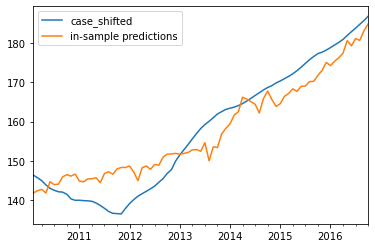

In [73]:
in_sample_results.plot()

<AxesSubplot:>

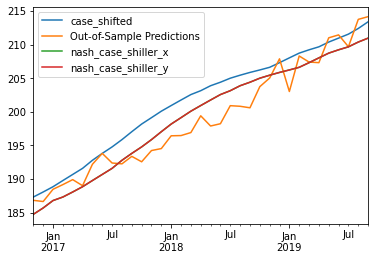

In [74]:
out_of_sample_results.plot()

In [75]:
#6M Model

X = nash_df_6M[["nash_unemployment","nash_labor_force","hr_wage_nash","sfr_perm_nash.csv","monthly_econindex_nash","weekly_nash_earnings","Weekly_Hours"]]

y = nash_df_6M[["case_shifted"]]

split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]


X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

model = linear_model.TweedieRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

out_of_sample_results = y_test

out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")

Out-of-sample Root Mean Squared Error (RMSE): 2.6942003214150905
Out-of-Sample r2: 0.865415810962745
In Sample Root Mean Squared Error (RMSE): 5.375560459326846
In sample r2: 0.8888039204094318


C:\Users\eprie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-75-5fbadfe69934>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
<ipython-input-75-5fbadfe69934>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_sample_resu

In [76]:
#24M Model

X = nash_df_24M[["nash_unemployment","nash_labor_force","hr_wage_nash","sfr_perm_nash.csv","monthly_econindex_nash","weekly_nash_earnings","Weekly_Hours"]]

y = nash_df_24M[["case_shifted"]]

split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]


X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

model = linear_model.TweedieRegressor()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

out_of_sample_results = y_test

out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")


Out-of-sample Root Mean Squared Error (RMSE): 4.0422405026759085
Out-of-Sample r2: 0.5021513257292338
In Sample Root Mean Squared Error (RMSE): 4.770238598305892
In sample r2: 0.9041197855422566


C:\Users\eprie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-76-9c9a41cd2e4d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
<ipython-input-76-9c9a41cd2e4d>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_sample_resu